In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
## Load the dataset
data = pd.read_excel('Data_female.xlsx',header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8
0,4.2,4500,121,80,27.5,33.4,40,215000,1
1,4.3,5000,122,81,27.6,33.5,41,150200,1
2,4.4,5100,123,82,27.7,33.6,42,150300,1
3,4.5,5200,124,83,27.8,33.7,43,150400,1
4,4.6,5300,125,84,27.9,33.8,44,150500,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
#scaler.fit(df.drop('TARGET CLASS',axis=1))
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [6]:
#scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
# #mean or standardization
X_train.mean(axis=0)
X_test.mean(axis=0)

0         4.113030
1      5392.828283
2       125.434343
3        77.232323
4        27.398384
5        33.581414
6        47.555556
7    174138.787879
dtype: float64

## Pair Plot

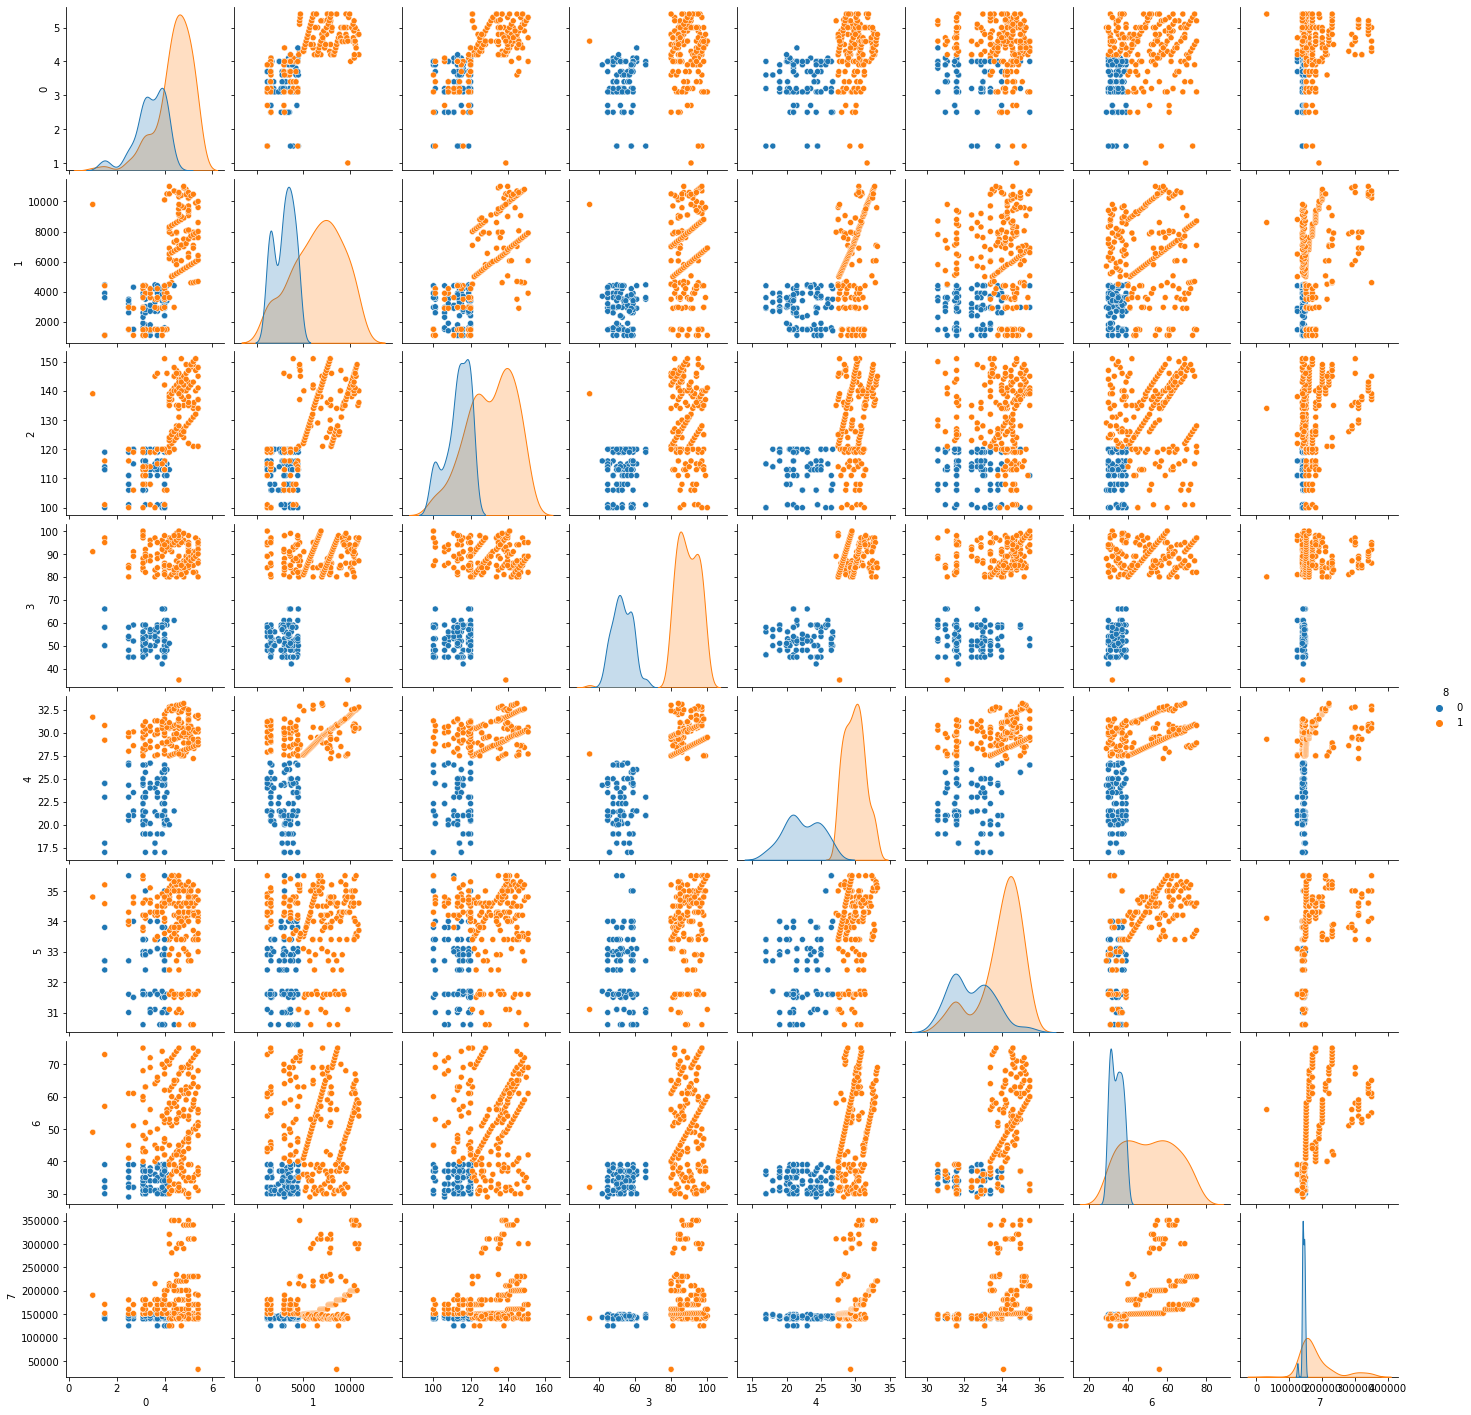

In [8]:
import seaborn as sns

sns.pairplot(data,hue=8)

## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
clf3=KNeighborsClassifier(n_neighbors=1)

In [13]:
clf3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
output = clf3.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [16]:
print(confusion_matrix(y_test, output))

[[32  0]
 [ 1 66]]


In [17]:
print(classification_report(y_test,output))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.99      0.99        67

    accuracy                           0.99        99
   macro avg       0.98      0.99      0.99        99
weighted avg       0.99      0.99      0.99        99



## Choosing a K Value


In [21]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
clf1=KNeighborsClassifier(n_neighbors=1)
clf1.fit(X_train, y_train)
output = clf1.predict(X_test)
knn = accuracy_score(y_test, output)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,output))
print('\n')
print(classification_report(y_test,output))
print('KNN1=',knn)

WITH K=1


[[32  0]
 [ 1 66]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.99      0.99        67

    accuracy                           0.99        99
   macro avg       0.98      0.99      0.99        99
weighted avg       0.99      0.99      0.99        99

KNN1= 0.98989898989899


In [19]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=3
clf3=KNeighborsClassifier(n_neighbors=3)
clf3.fit(X_train, y_train)
output = clf1.predict(X_test)
knn = accuracy_score(y_test, output)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,output))
print('\n')
print(classification_report(y_test,output))
print('KNN3=',knn)

WITH K=3


[[32  0]
 [ 1 66]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.99      0.99        67

    accuracy                           0.99        99
   macro avg       0.98      0.99      0.99        99
weighted avg       0.99      0.99      0.99        99

KNN3= 0.98989898989899


Dumping File

In [20]:
joblib.dump(clf3, 'knnfemale.sav')

['knnfemale.sav']